# Linear Discriminant Analysis (LDA) for Sensory Data

This notebook demonstrates **Linear Discriminant Analysis (LDA)**, a supervised dimensionality reduction and classification technique. LDA finds linear combinations of features that best separate different classes (e.g., different products) in the data.

**What is Linear Discriminant Analysis?**
- A method that finds linear combinations of features that maximize separation between classes
- Useful for both dimensionality reduction and classification
- Projects data onto a lower-dimensional space while preserving class separability
- Helps identify which sensory attributes best distinguish between products

**Learning Objectives:**
- Understand the concept of LDA and when to use it
- Perform LDA for classification of sensory products
- Interpret LDA loadings (which attributes contribute to discrimination)
- Visualize products in LDA space
- Evaluate classification performance using confusion matrices

---

## Installation Instructions

Before running this notebook, make sure you have the required packages installed. Run the following command in your terminal or command prompt:

```bash
pip install pandas numpy scikit-learn matplotlib seaborn
```

If you are using Anaconda, you can also install using conda:
```bash
conda install pandas numpy scikit-learn matplotlib seaborn
```

---

## Data Credits

This notebook uses the `sensochoc` dataset from the R package `SensoMineR`:

**Citation:**
François Husson, Sébastien Lê, and Marine Cadoret. SensoMineR: Sensory Data Analysis, 2025. URL https://CRAN.R-project.org/package=SensoMineR. R package version 1.28.

We acknowledge and thank the authors for making this dataset publicly available for educational and research purposes.


## 1. Import Required Libraries

We will import all necessary libraries for data manipulation, machine learning, and visualization.

In [8]:
# Data manipulation
import pandas as pd
import numpy as np

# Machine learning
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Illinois colors for visualizations
illiniorange = "#FF5F05"
illiniblue = "#13294B"


## 2. Load and Explore Data

We will load the chocolate sensory data. This dataset contains sensory evaluations of different chocolate products, with multiple sensory attributes measured by panelists.


In [9]:
# Load the chocolate sensory dataset
# This dataset is from the R package SensoMineR
df = pd.read_csv("data/sensochoc.csv")

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nFirst few rows:")
print(df.head())
print("\nUnique products:")
print(df['Product'].unique())


Dataset shape: (348, 18)

Column names:
['Panelist', 'Session', 'Rank', 'Product', 'CocoaA', 'MilkA', 'CocoaF', 'MilkF', 'Caramel', 'Vanilla', 'Sweetness', 'Acidity', 'Bitterness', 'Astringency', 'Crunchy', 'Melting', 'Sticky', 'Granular']

Data types:
Panelist        int64
Session         int64
Rank            int64
Product        object
CocoaA          int64
MilkA           int64
CocoaF          int64
MilkF           int64
Caramel         int64
Vanilla         int64
Sweetness       int64
Acidity         int64
Bitterness      int64
Astringency     int64
Crunchy         int64
Melting         int64
Sticky          int64
Granular        int64
dtype: object

First few rows:
   Panelist  Session  Rank Product  CocoaA  MilkA  CocoaF  MilkF  Caramel  \
0         1        1     1   choc6       7      6       6      5        5   
1         1        1     6   choc3       6      7       2      7        8   
2         1        1     3   choc2       8      6       5      4        7   
3         1 

## 3. Prepare Data for LDA

Before performing LDA, we need to:
1. Separate qualitative variables (identifiers) from sensory attributes (predictors)
2. Prepare the feature matrix (X) containing sensory attributes
3. Prepare the target vector (y) containing product labels
4. Split the data into training and testing sets

**Why split the data?**
- Training set: Used to fit the LDA model
- Testing set: Used to evaluate how well the model generalizes to new data
- Stratified split ensures each product class is represented proportionally in both sets


In [10]:
# Identify qualitative variables (identifiers, not predictors)
qual_vars = ['Panelist', 'Session', 'Form', 'Rank', 'Product']

# Extract sensory descriptor columns (all columns except qualitative variables)
sensory_cols = [c for c in df.columns if c not in qual_vars]

print(f"Number of sensory attributes: {len(sensory_cols)}")
print(f"Sensory attributes: {sensory_cols}")

# Prepare feature matrix (X) and target vector (y)
X = df[sensory_cols].values              # Predictors: sensory attributes
y = df['Product'].astype(str).values     # Target: product identity (6 chocolate types)

print(f"\nFeature matrix shape: {X.shape} (samples × features)")
print(f"Number of unique products: {len(np.unique(y))}")
print(f"Products: {sorted(np.unique(y))}")

# Split data into training and testing sets
# test_size=0.3 means 30% of data for testing, 70% for training
# stratify=y ensures proportional representation of each product in both sets
# random_state ensures reproducible results
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Number of sensory attributes: 14
Sensory attributes: ['CocoaA', 'MilkA', 'CocoaF', 'MilkF', 'Caramel', 'Vanilla', 'Sweetness', 'Acidity', 'Bitterness', 'Astringency', 'Crunchy', 'Melting', 'Sticky', 'Granular']

Feature matrix shape: (348, 14) (samples × features)
Number of unique products: 6
Products: ['choc1', 'choc2', 'choc3', 'choc4', 'choc5', 'choc6']

Training set size: 243 samples
Testing set size: 105 samples


## 4. Fit Linear Discriminant Analysis Model

LDA finds linear combinations of sensory attributes that maximize the separation between different chocolate products. The model learns from the training data and can then be used to:
1. Transform data into a lower-dimensional LDA space
2. Classify new samples based on their sensory attributes

**How LDA works:**
- Finds directions (linear discriminants) that maximize between-class variance
- Minimizes within-class variance
- Projects data onto these directions for visualization and classification


In [12]:
# Create and fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Transform all data to LDA space (for visualization)
# This projects data onto the linear discriminant axes
X_lda = lda.transform(X)

# Predict product labels for test set
y_pred = lda.predict(X_test)

print("LDA Model Fitted Successfully")
print(f"Number of linear discriminants: {X_lda.shape[1]}")
print(f"Number of classes: {len(lda.classes_)}")


LDA Model Fitted Successfully
Number of linear discriminants: 5
Number of classes: 6


## 5. Evaluate Classification Performance

We will evaluate how well the LDA model can classify chocolate products using the test set. The confusion matrix shows which products are correctly classified and which are confused with other products.

**Understanding the metrics:**
- **Precision**: Of all samples predicted as a product, how many were actually that product?
- **Recall**: Of all samples that are actually a product, how many were correctly identified?
- **F1-score**: Harmonic mean of precision and recall
- **Accuracy**: Overall proportion of correct classifications


In [13]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print("="*60)
print("Rows = True labels, Columns = Predicted labels")
print("Diagonal values = correct classifications")
print("Off-diagonal values = misclassifications")
print("\n" + str(cm))

# Classification report with detailed metrics
print("\n" + "="*60)
print("Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred))


Confusion Matrix:
Rows = True labels, Columns = Predicted labels
Diagonal values = correct classifications
Off-diagonal values = misclassifications

[[13  2  0  3  0  0]
 [ 2  7  0  3  3  2]
 [ 1  0 14  1  0  2]
 [ 7  3  1  2  3  1]
 [ 3  2  2  1  2  7]
 [ 1  3  1  1  3  9]]

Classification Report:
              precision    recall  f1-score   support

       choc1       0.48      0.72      0.58        18
       choc2       0.41      0.41      0.41        17
       choc3       0.78      0.78      0.78        18
       choc4       0.18      0.12      0.14        17
       choc5       0.18      0.12      0.14        17
       choc6       0.43      0.50      0.46        18

    accuracy                           0.45       105
   macro avg       0.41      0.44      0.42       105
weighted avg       0.41      0.45      0.42       105



## 6. Visualize Confusion Matrix

A heatmap of the confusion matrix provides a visual representation of classification performance. Darker colors indicate more samples, making it easy to see which products are well-separated and which are frequently confused.


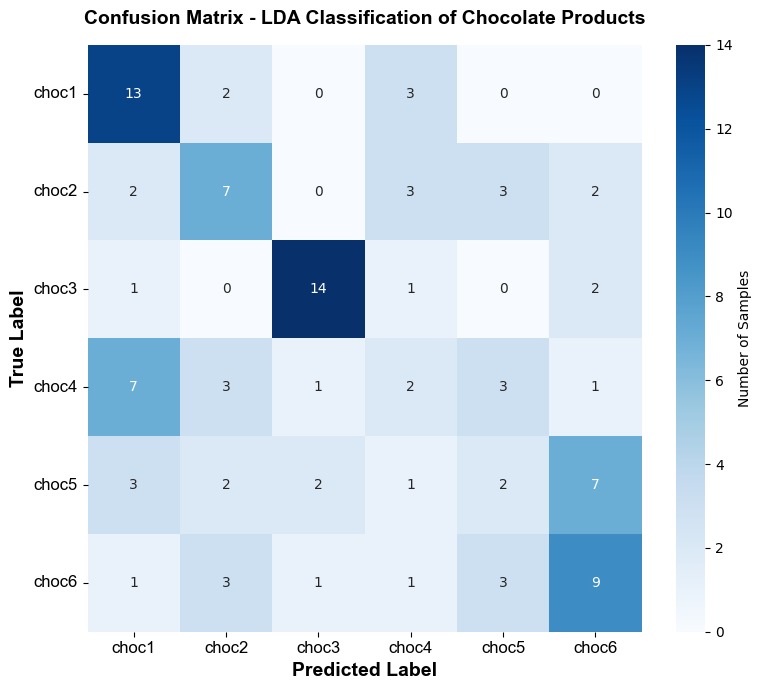

In [14]:
# Create heatmap of confusion matrix
products = sorted(list(set(y)))
plt.figure(figsize=(8, 7))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=products, 
            yticklabels=products,
            cbar_kws={'label': 'Number of Samples'})

plt.xlabel('Predicted Label', fontsize=14, fontfamily="Arial", fontweight="bold")
plt.ylabel('True Label', fontsize=14, fontfamily="Arial", fontweight="bold")
plt.title('Confusion Matrix - LDA Classification of Chocolate Products', 
          fontsize=14, fontweight='bold', fontfamily="Arial", pad=15)
plt.xticks(fontsize=12, fontfamily="Arial", rotation=0)
plt.yticks(fontsize=12, fontfamily="Arial", rotation=0)
plt.tight_layout()
plt.show()


## 7. Visualize Products in LDA Space

A scatter plot of products in LDA space shows how well different chocolate products are separated. Products that are well-separated in this space are easier to distinguish based on their sensory attributes. This visualization helps identify:
- Which products are similar (close together)
- Which products are distinct (far apart)
- The main dimensions of product differentiation


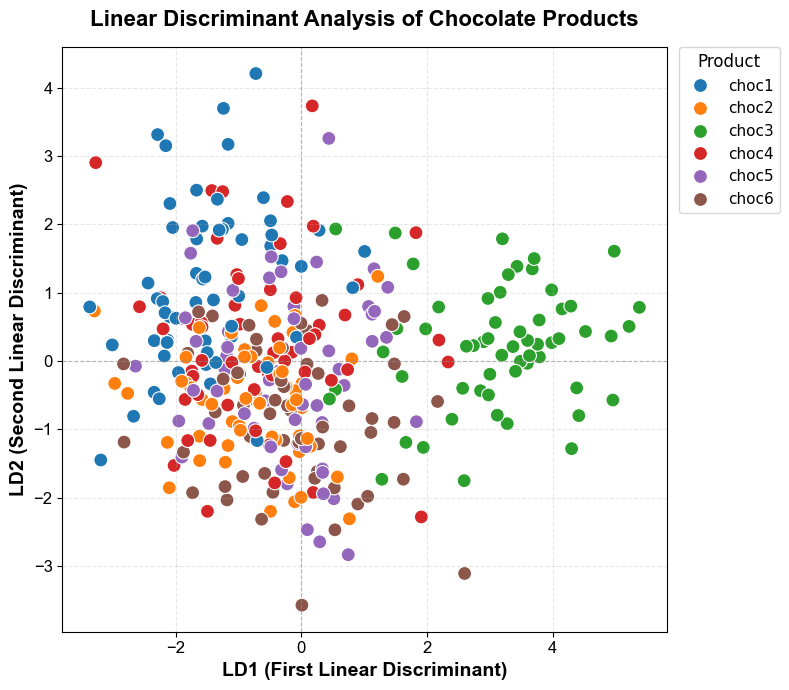

In [19]:
# Prepare data for visualization
# Specify legend order as 'choc1' to 'choc6'
legend_order = [f"choc{i}" for i in range(1, 7)]

# Create dataframe with LDA coordinates and product labels
lda_df = pd.DataFrame({
    'LD1': X_lda[:, 0],
    'LD2': X_lda[:, 1] if X_lda.shape[1] > 1 else np.zeros(X_lda.shape[0]),
    'Product': pd.Categorical(y, categories=legend_order, ordered=True)
})

# Create scatter plot
plt.figure(figsize=(8, 7))
scatter = sns.scatterplot(
    data=lda_df,
    x='LD1',
    y='LD2',
    hue='Product',
    hue_order=legend_order,
    s=100
)

# Add reference lines at zero
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--', alpha=0.5)
plt.axvline(0, color='grey', linewidth=0.8, linestyle='--', alpha=0.5)

plt.title('Linear Discriminant Analysis of Chocolate Products', 
          fontsize=16, fontweight="bold", fontfamily="Arial", pad=15)
plt.xlabel("LD1 (First Linear Discriminant)", fontsize=14, fontweight="bold", fontfamily="Arial")
plt.ylabel("LD2 (Second Linear Discriminant)", fontsize=14, fontweight="bold", fontfamily="Arial")
plt.xticks(fontsize=12, fontfamily="Arial")
plt.yticks(fontsize=12, fontfamily="Arial")
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0,
    title="Product",
    fontsize=11,
    title_fontsize=12
)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


## 8. Visualize LDA Loadings

LDA loadings (coefficients) show which sensory attributes contribute most to each linear discriminant. This helps interpret what each discriminant represents and which attributes are most important for distinguishing between products.

**Interpreting loadings:**
- High absolute values indicate attributes that strongly contribute to that discriminant
- Positive loadings indicate attributes that increase together
- Negative loadings indicate attributes that vary in opposite directions
- Attributes with high loadings on LD1 are most important for the primary separation


LDA Loadings (Coefficients):
These values show how each attribute contributes to each linear discriminant
Higher absolute values = stronger contribution to that discriminant

               LD1    LD2
CocoaA      -0.033  0.048
MilkA       -0.052 -0.072
CocoaF      -0.008  0.141
MilkF        0.303  0.087
Caramel      0.211 -0.052
Vanilla     -0.102 -0.052
Sweetness    0.029 -0.136
Acidity      0.002  0.149
Bitterness  -0.173  0.095
Astringency -0.075  0.031
Crunchy     -0.131 -0.419
Melting      0.051  0.132
Sticky       0.078  0.044
Granular    -0.031  0.014


<Figure size 800x600 with 0 Axes>

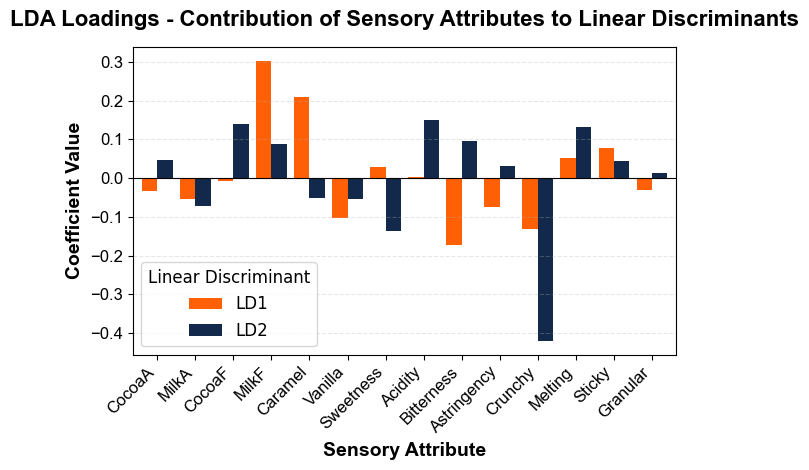

In [22]:
# Extract LDA loadings (coefficients)
# Loadings show how each sensory attribute contributes to each linear discriminant
n_ld = min(2, lda.scalings_.shape[1])  # Plot for LD1 and LD2 if available

lda_loadings = pd.DataFrame(
    lda.scalings_[:, :n_ld],
    index=sensory_cols,
    columns=[f"LD{i+1}" for i in range(n_ld)]
)

print("LDA Loadings (Coefficients):")
print("="*60)
print("These values show how each attribute contributes to each linear discriminant")
print("Higher absolute values = stronger contribution to that discriminant")
print("\n" + lda_loadings.round(3).to_string())

# Create bar plot of loadings
bar_colors = [illiniorange, illiniblue][:n_ld]

plt.figure(figsize=(8, 6))
ax = lda_loadings.plot(kind="bar", color=bar_colors, width=0.8)
plt.title("LDA Loadings - Contribution of Sensory Attributes to Linear Discriminants", 
          fontsize=16, fontweight="bold", fontfamily="Arial", pad=15)
plt.ylabel("Coefficient Value", fontsize=14, fontfamily="Arial", fontweight="bold")
plt.xlabel("Sensory Attribute", fontsize=14, fontfamily="Arial", fontweight="bold")
plt.xticks(rotation=45, ha='right', fontsize=12, fontfamily="Arial")
plt.yticks(fontsize=12, fontfamily="Arial")
plt.axhline(0, color='black', linewidth=0.8, linestyle='-')
plt.legend(fontsize=12, title="Linear Discriminant", title_fontsize=12)
plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()
